<a href="https://colab.research.google.com/github/paulomarc49/ETo_climate/blob/main/ETo_weather_tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Run if have access to drive:

from google.colab import drive
drive.mount('/content/drive')
numpy_data = np.load('/content/drive/MyDrive/ETo/data_april_2024.npy')

Mounted at /content/drive


In [ ]:
# Run if no access to drive and want to download the file:

!pip install gdown
file_id = '1jrMMuLAVbsdhxTm8icgoH0tOLMRpw22n'
import gdown
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'data_april_2024.npy', quiet=False)

numpy_data = np.load('data_april_2024.npy')

In [3]:
# Load converted data of April 2024

print("Shape of the input data: ", numpy_data.shape)

# Input data is an array of three dimentions with the shape: ( d * x, y, 8 variables * 24 hours ) d: day, x: Pixel "X", y: Pixel "Y", 8 * 24 number of variables per hour
d, x, y, n_variables = 30, 171, 171, 192
# Reshape to: d*x, y, 3, 2
numpy_data = numpy_data.reshape(d, x, y, 24, 8)
# Flattering
numpy_data = numpy_data.transpose(0, 3, 1, 2, 4).reshape(-1, 8)
numpy_data = numpy_data.astype(np.float16)
print("Shape of the flattered input data: ", numpy_data.shape)

Shape of the input data:  (5130, 171, 192)
Shape of the flattered input data:  (21053520, 8)


In [4]:
# Data convertion from numpy to pandas

pandas_data = pd.DataFrame(numpy_data, columns=['Net_Radiation',
                                                'Ground_Flux',
                                                'Air_Temperature',
                                                'Vapor_Pressure_Curve',
                                                'Psycometric_Constant',
                                                'Saturated_Vapor_Pressure',
                                                'Actual_Vapor_Pressure',
                                                'Wind_Speed'])
pandas_data
#pandas_data=pandas_data.iloc[0:701784]

,Net_Radiation,Ground_Flux,Air_Temperature,Vapor_Pressure_Curve,Psycometric_Constant,Saturated_Vapor_Pressure,Actual_Vapor_Pressure,Wind_Speed
0,-0.700195,0.002890,23.265625,0.172363,0.065430,2.857422,2.693359,1.362305
1,-0.711426,0.005718,23.125000,0.171143,0.065186,2.832031,2.681641,1.451172
2,-0.707520,0.006886,23.140625,0.171265,0.065552,2.835938,2.697266,1.356445
3,-0.716797,0.012505,23.140625,0.171143,0.065979,2.832031,2.724609,1.135742
4,-0.721191,0.014557,23.078125,0.170654,0.066284,2.824219,2.742188,1.007812
...,...,...,...,...,...,...,...,...
21053515,0.057190,0.028320,25.531250,0.193970,0.066162,3.269531,3.039062,1.163086
21053516,0.058411,0.029175,25.593750,0.194580,0.066162,3.283203,3.027344,1.161133
21053517,0.025055,0.047791,24.953125,0.188354,0.066162,3.162109,2.970703,1.102539
21053518,-0.004932,0.067810,24.265625,0.181641,0.066162,3.031250,2.917969,1.168945


In [5]:
pandas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053520 entries, 0 to 21053519
Data columns (total 8 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Net_Radiation             float16
 1   Ground_Flux               float16
 2   Air_Temperature           float16
 3   Vapor_Pressure_Curve      float16
 4   Psycometric_Constant      float16
 5   Saturated_Vapor_Pressure  float16
 6   Actual_Vapor_Pressure     float16
 7   Wind_Speed                float16
dtypes: float16(8)
memory usage: 321.3 MB


In [6]:
# Function for plotting SOM clusters:

def plot_one_day_(numpy_data, labels):
    d, x, y, n_variables = 30, 171, 171, 192
    classes = labels
    # Flattering original array
    variables_flat = numpy_data
    variables_flat = variables_flat[0:701784]
    print(f"Input data flattered shape: {variables_flat.shape}")
    # Reshape labels array
    classes = classes.reshape(-1, 1)
    classes = classes[0:701784]
    print(f"Output layer label:         {classes.shape}")
    # Join of flattered original array and labels array
    array_con_etiquetas = np.concatenate((variables_flat, classes), axis=-1)
    print(f"Joined array:               {array_con_etiquetas.shape}")
    # Reshape of joined array
    array_con_etiquetas = array_con_etiquetas.reshape(1, 24, x, y,9)
    array_con_etiquetas = array_con_etiquetas.transpose(0, 2, 3, 1, 4)
    array_con_etiquetas = array_con_etiquetas.reshape(1*x, y, 24*9)
    print(f"Reshaped joined array:      {array_con_etiquetas.shape}")
    # Plot code
    import matplotlib.pyplot as plt
    data = array_con_etiquetas[:,:,107]
    plt.figure(figsize=(7,5))
    plt.imshow(data, cmap='viridis', interpolation='bilinear')
    plt.colorbar(label='ETo clusters')
    plt.title(f'ETo wheather heatmap sample. Total distortion: {distortion}')
    plt.xlabel('Pixel X')
    plt.ylabel('Pixel Y')
    plt.show()

## Implementation with sci-kit learn SOM

In [7]:
!pip install sklearn-som

import  warnings
from    sklearn.base             import BaseEstimator, ClusterMixin
from    sklearn_som.som          import SOM as SklearnSOM
from    tqdm                     import tqdm

warnings.filterwarnings("ignore")

In [8]:
#Customization of sci-kit learn SOM

class CustomSOM(BaseEstimator, ClusterMixin):
    def __init__(self, m=1, n=3, dim=4, sigma=1.7, lr=0.1, max_iter=10, random_state=None):
        self.m = m
        self.n = n
        self.dim = dim
        self.sigma = sigma
        self.lr = lr
        self.max_iter = max_iter
        self.random_state = random_state
        self.model_ = None

    def fit(self, X, y=None):
        self.model_ = SklearnSOM(m=self.m, n=self.n, dim=self.dim, lr=self.lr, max_iter=self.max_iter, random_state=self.random_state)
        self.model_.fit(X)
        return self

    def predict(self, X):
        return self.model_.predict(X)

    def transform(self, X):
        return self.model_.transform(X)

    def score(self, X, y=None):
        distancias_punto_centroide = self.transform(X)
        distorsion_total = 0
        for i in range(len(distancias_punto_centroide)):
            distancias_minimas_cuadradas = (np.min(distancias_punto_centroide[i]))**2
            distorsion_total += distancias_minimas_cuadradas
        return distorsion_total

In [9]:
from joblib import Parallel, delayed
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define "k" values to test
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
distortions = []

# Function to compute distortion for a given k
def compute_distortion(k, data):
    model_SOM_2 = Pipeline([
        ('scal', StandardScaler()),
        ('som', CustomSOM(m=k, n=2, dim=8, lr=1.491, max_iter=90, random_state=42))
    ])
    # Transform the data and fit the SOM
    SOM_train_inicial = model_SOM_2[:-1].fit_transform(data)
    SOM_train = model_SOM_2[-1].fit(SOM_train_inicial)
    # Calculate distortion
    distortion_SOM_train = model_SOM_2.named_steps['som'].score(SOM_train_inicial)
    return distortion_SOM_train

# Run the computations in parallel
distortions = Parallel(n_jobs=10)(delayed(compute_distortion)(k, pandas_data) for k in tqdm(k_values, desc="Training SOM"))

Training SOM: 100%|██████████| 19/19 [00:00<00:00, 106.35it/s]


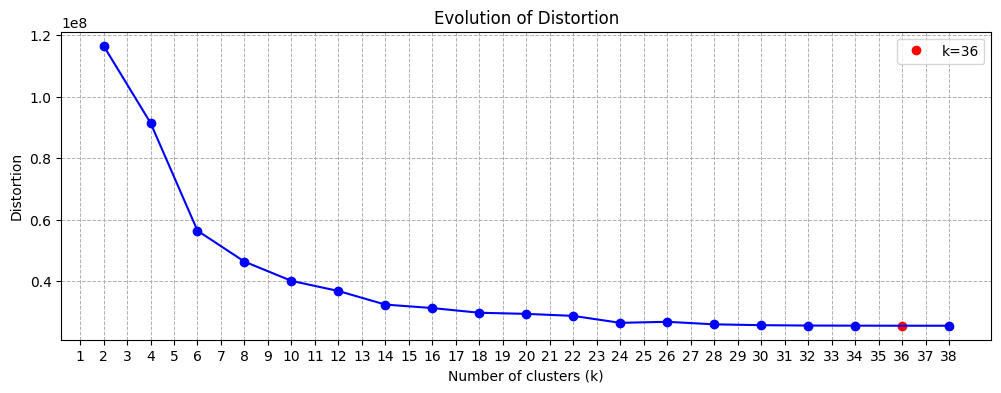

In [10]:
# Plot the distortion in terms of k
plt.figure(figsize=(12, 4))

# Define x-values and plot all points except the one at x = 36
x_values = range(2, 39, 2)
for x, y in zip(x_values, distortions):
    if x == 36:
        plt.plot(x, y, 'ro', label='k=36')  # Highlighting the point at k=36
    else:
        plt.plot(x, y, 'bo')  # All other points

# Connect the points with a line
plt.plot(x_values, distortions, 'b-')
plt.xticks(range(1, 39))
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Evolution of Distortion')
plt.legend()

# Show plot and save it in high definition
plt.savefig("distortion_plot_hd.png", dpi=300, bbox_inches='tight')
plt.show()
